In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

# !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [7]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


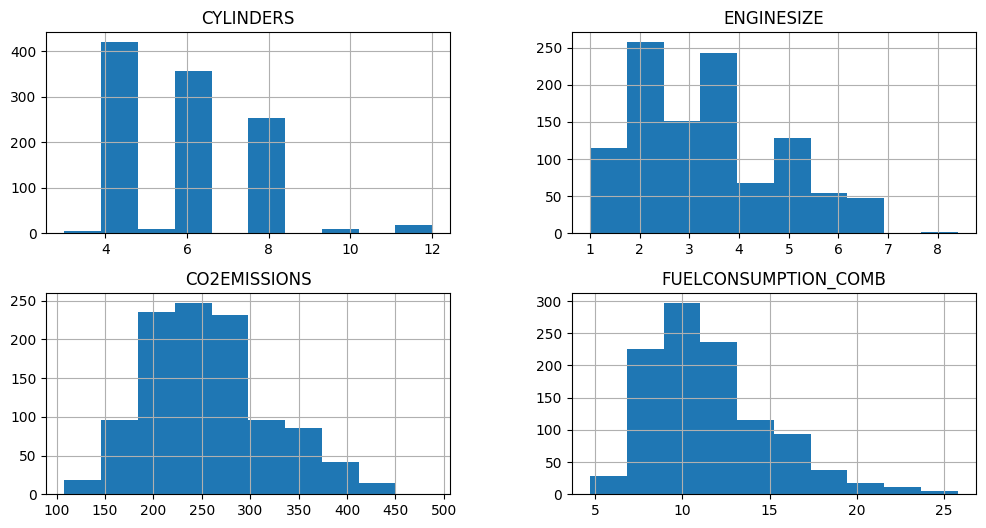

In [8]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

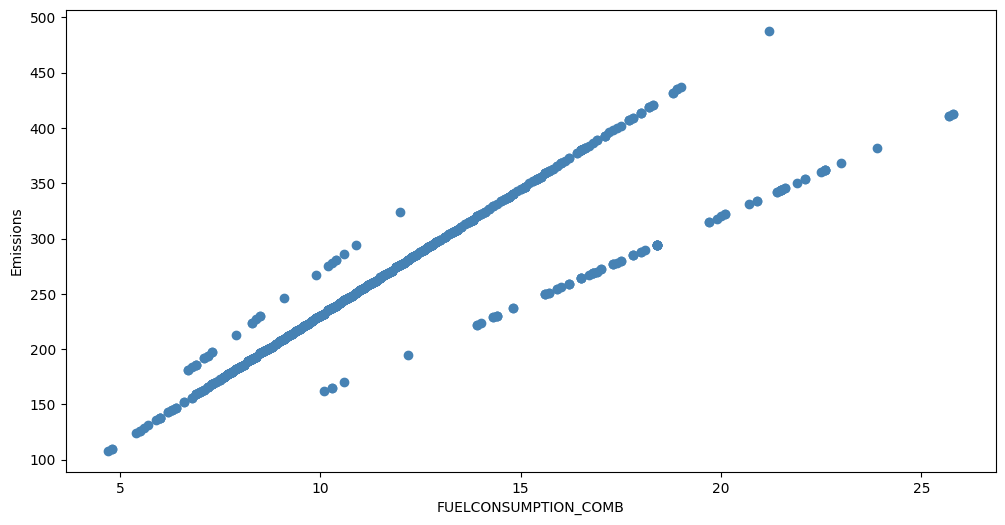

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

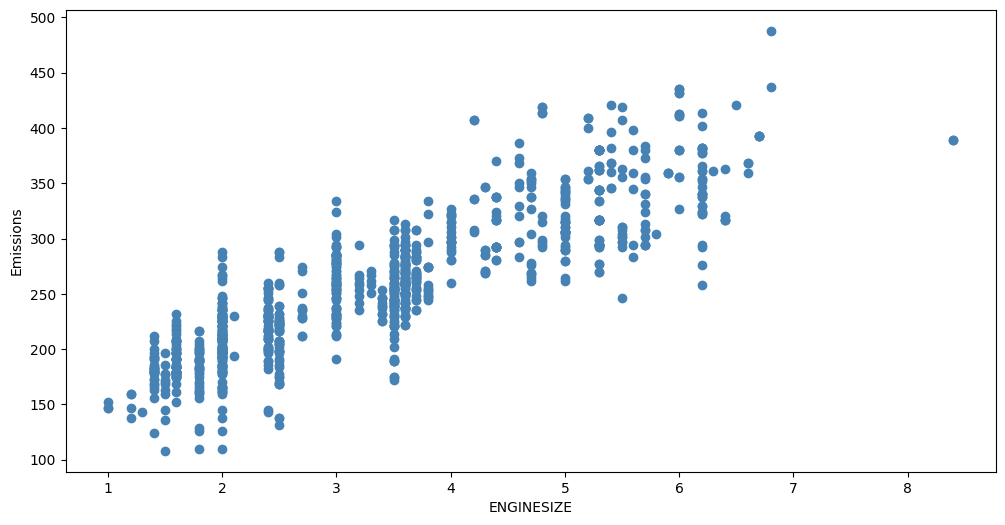

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

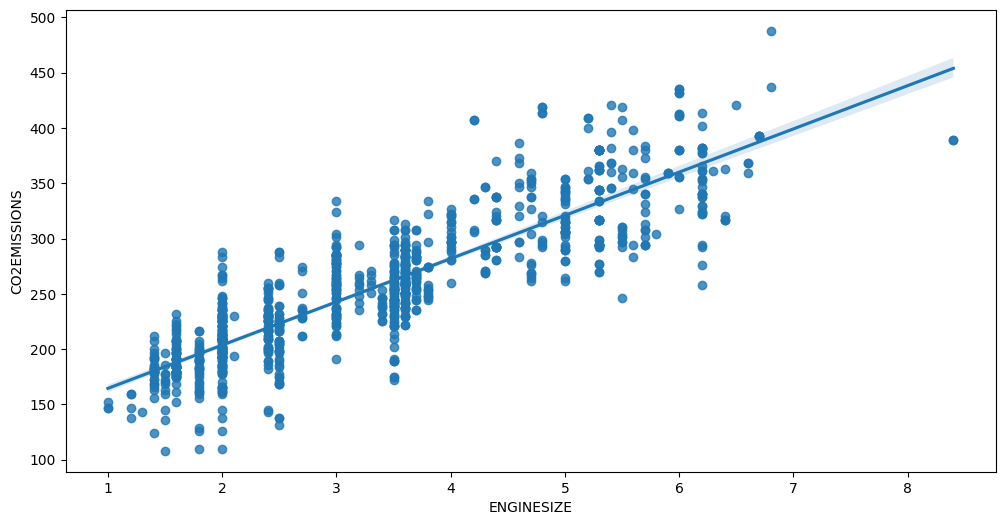

In [11]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

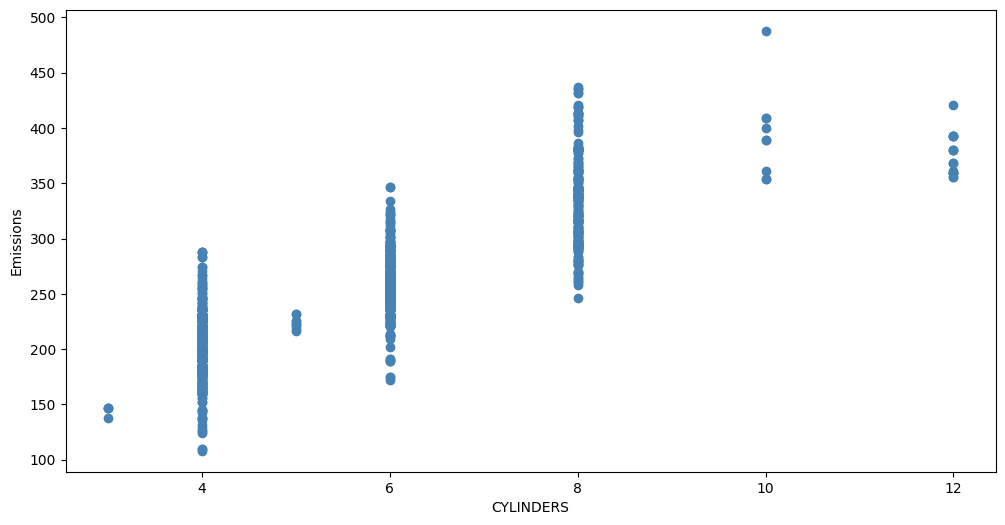

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

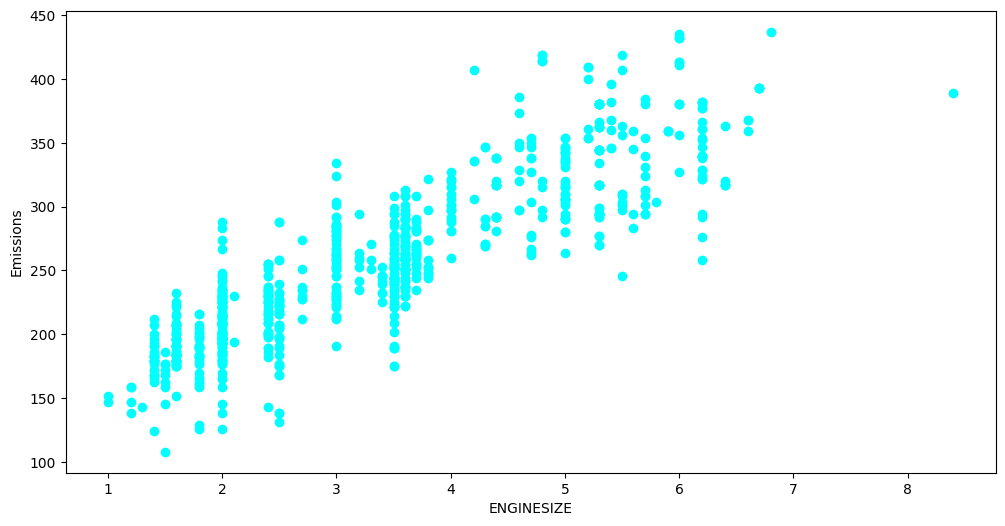

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

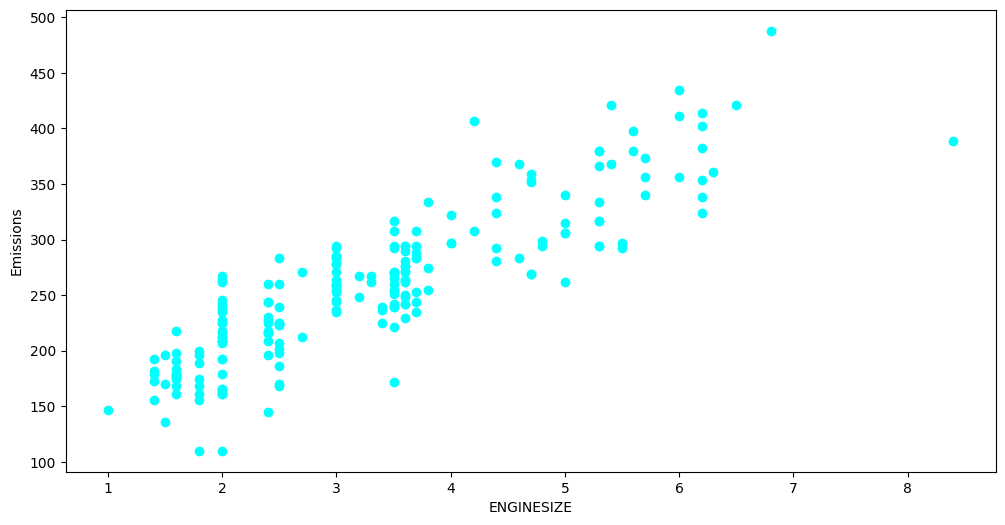

In [15]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [17]:
print(regr.coef_) # θ1
print(regr.intercept_) # θ0

[[38.2716525]]
[127.35717455]


# Simple regression formula
y ̂ = θ0 + θ1 x1
y = a + b * x

y = mx + b
y = regr.coef_ * x + intercept_

CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_

Text(0, 0.5, 'Emission')

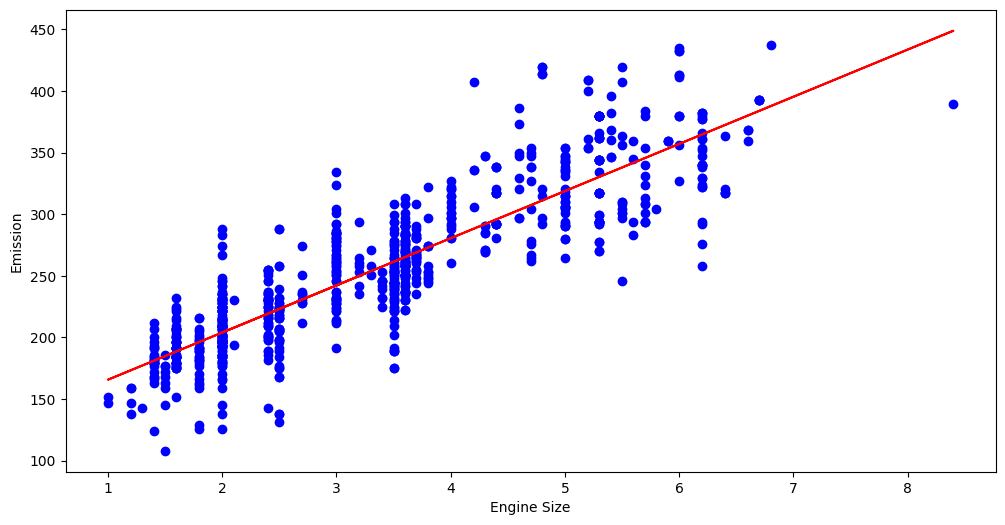

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

# Model evaluation metrics:
- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [20]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 26.17
Residual sum of squares (MSE): 1139.57
R2-score: 0.76


In [21]:
# TODO
# Calculate values for FUELCONSUMPTION_COMB
# Use scikit-learn to implement Multiple Linear Regression
# Create a model, train it, test it and use the model

# first data-set
Mean absolute error: 23.56
Residual sum of squares (MSE): 974.39
R2-score: 0.76

In [ ]:
# Multiple regression
# Tahmini güçlendirme
# Değişiklikleri gözeten , etki oranını görebiliriz


# Multiple regression formula
y = m0 ENGINE SIZE + b0 + m1 CYLINDERS+ b1 +...+mn xn + bn

Değişkenlerin hepsini yeni bir matris olarak algoritma hesaplıycak
Optimize parametreleri bulurken hata değerini düşürmeye çalışıyoruz


y = regr.coef_ * x + intercept_

CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_

Kat sayılardan hangi değişkenin daha fazla etki ettiğini görebiliriz
CO2EMISSIONS= 125 + 7.5 * ENGINESIZE + 15 * CYLINDERS +

In [22]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


y = 150
196- 150 = 46 'residual error'

Calculate 'MSE' value for model accuracy

How to estimate multiple linear regression parameters ?
- How to estimate 0?
    - Ordinary Least Squares
        - Takes long timefor large dataset (10K+ rows)

    - An optimazation algorithm
        - Gradient Descent


In [25]:
cdf = df[ ['ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

In [26]:
cdf

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...
1062,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [27]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [33]:
regr =linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS',
        'FUELCONSUMPTION_COMB',
       ]])
y = np.asanyarray(train[['CO2EMISSIONS']]) 

In [34]:
regr.fit(x,y)

LinearRegression()

In [35]:
print(regr.coef_)

[[11.06611354  7.33344558  9.55347866]]


In [36]:
x_test = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS',
        'FUELCONSUMPTION_COMB',
       ]])
y_test = np.asanyarray(test[['CO2EMISSIONS']]) 

In [37]:
#Prediction
y_hat = regr.predict(x_test)


In [39]:
print("Mean Squared error: %.2f" % np.mean((y_hat-y_test)**2))
print("Variance-score: %.2f" % regr.score(x_test , y_test) )


Mean Squared error: 524.62
Variance-score: 0.87


### TODO
How to use Mean Squared error (MSE) in multiple regression

In [40]:
regr =linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS',
        'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY',
       ]])
y = np.asanyarray(train[['CO2EMISSIONS']]) 

In [41]:
regr.fit(x,y)

LinearRegression()

In [42]:
print(regr.coef_)

[[11.29645831  6.7071394   6.72175283  2.33784026]]


In [44]:
x_test = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS',
        'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY',
       ]])
y_test = np.asanyarray(test[['CO2EMISSIONS']]) 

In [45]:
y_hat = regr.predict(x_test)


In [46]:

print("Mean Squared error: %.2f" % np.mean((y_hat-y_test)**2))
print("Variance-score: %.2f" % regr.score(x_test , y_test) )

Mean Squared error: 530.41
Variance-score: 0.86
